# Clasification pipeline - Evaluation of individual classifiers

In [1]:
import os

# Function to change to the parent directory
def change_to_parent_directory():
    # Check if the directory has already been changed
    if not os.environ.get('DIR_CHANGED'):
        try:
            current_dir = os.path.dirname(os.path.abspath(__file__))
        except NameError:
            current_dir = os.getcwd()
        parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
        os.chdir(parent_dir)
        os.environ['DIR_CHANGED'] = '1'
        print(f"Current working directory changed to: {os.getcwd()}")
    else:
        print("Directory has already been changed.")

# Call the function to change the working directory
change_to_parent_directory()

Current working directory changed to: /home/ihranicky/git/domainradar-clf


## Run classification

In [2]:
# Specify the parquet file with the dataset for classification
test_dataset = 'testdata/ver_html_test.parquet'

In [3]:
import pandas as pd
import numpy as np
from classifiers.pipeline import Pipeline

# Initialize the classification pipeline
clf = Pipeline()

# Read the input parquet file
input_df = pd.read_parquet(test_dataset)

#input_df = input_df.sample(frac=1).reset_index(drop=True)

df = clf.generate_preliminary_results(input_df, add_final=False)

2024-11-23 17:44:12.760536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ihranicky/git/domainradar-clf/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CNN model created


In [4]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
df

# Assuming df is the given dataframe
columns_to_drop = df.filter(regex='(_sum|_avg|_prod)$').columns
df_filtered = df.drop(columns=columns_to_drop)

# Now print the remaining column names
df_filtered_columns = df_filtered.columns.tolist()
df_filtered_columns

['domain_name',
 'dns_available',
 'dns_nonzero',
 'tls_available',
 'tls_nonzero',
 'ip_available',
 'ip_nonzero',
 'rdap_available',
 'rdap_nonzero',
 'geo_available',
 'geo_nonzero',
 'phishing_cnn_result',
 'phishing_lgbm_result',
 'phishing_xgboost_result',
 'phishing_deepnn_result',
 'phishing_dns_nn_result',
 'phishing_rdap_nn_result',
 'phishing_geo_nn_result',
 'phishing_ip_nn_result',
 'phishing_html_lgbm_result',
 'malware_lgbm_result',
 'malware_xgboost_result',
 'malware_deepnn_result',
 'malware_dns_nn_result',
 'malware_rdap_nn_result',
 'malware_geo_nn_result',
 'malware_ip_nn_result',
 'malware_html_lgbm_result',
 'malware_residual_result',
 'malware_cnn_result',
 'malware_gru_result',
 'malware_deep_result',
 'dga_binary_deepnn_result',
 'dga_binary_lgbm_result',
 'label']

In [5]:
#pd.set_option('display.max_rows', None)
#preliminary_results_df[preliminary_results_df["label"].isin(["benign", "phishing"])][["domain_name", "label", "phishing_cnn_result", "phishing_deepnn_result", "phishing_lgbm_result", "phishing_xgboost_result", "phishing_dns_nn_result", "phishing_rdap_nn_result", "phishing_geo_nn_result", "phishing_ip_nn_result"]]
#df[df["label"].isin(["benign", "phishing"])][["domain_name", "label", "phishing_cnn_result", "phishing_xgboost_result", "phishing_dns_nn_result", "phishing_rdap_nn_result", "phishing_geo_nn_result", "phishing_ip_nn_result"]]

In [6]:
df

,domain_name,dns_available,dns_nonzero,tls_available,tls_nonzero,ip_available,ip_nonzero,rdap_available,rdap_nonzero,geo_available,geo_nonzero,phishing_cnn_result,phishing_lgbm_result,phishing_xgboost_result,phishing_deepnn_result,phishing_dns_nn_result,phishing_rdap_nn_result,phishing_geo_nn_result,phishing_ip_nn_result,phishing_html_lgbm_result,malware_lgbm_result,malware_xgboost_result,malware_deepnn_result,malware_dns_nn_result,malware_rdap_nn_result,malware_geo_nn_result,malware_ip_nn_result,malware_html_lgbm_result,malware_residual_result,malware_cnn_result,malware_gru_result,malware_deep_result,dga_binary_deepnn_result,dga_binary_lgbm_result,phishing_sum,phishing_avg,phishing_prod,malware_sum,malware_avg,malware_prod,dga_binary_sum,dga_binary_avg,dga_binary_prod,total_sum,total_avg,total_prod,label
550,worker-holy-pine-27e9.fosaxef542.workers.dev,0.900,0.550,1.000000,0.833333,1.000,0.750,1.000000,0.750000,1.0,1.000000,9.932792e-01,0.847032,0.709823,1.000000,0.987616,0.796403,0.397401,0.534458,0.798855,0.000676,0.002657,6.898060e-03,0.763392,0.005459,0.688216,0.568495,0.863375,5.900664e-02,0.0,2.498630e-19,3.046755e-04,0.000000e+00,6.611999e-08,7.064866,0.784985,7.969882e-02,2.958480,0.246540,0.0,6.611999e-08,3.306000e-08,0.000000e+00,10.023346,0.435798,0.0,phishing
78,www.originalni.cz,0.600,0.200,1.000000,0.750000,1.000,0.375,1.000000,0.708333,1.0,0.666667,3.713404e-02,0.016446,0.001349,0.598393,0.013542,0.024368,0.004337,0.053412,0.081562,0.001217,0.002944,1.109537e-05,0.130250,0.006806,0.060135,0.005519,0.016988,7.455925e-25,0.0,9.081870e-22,8.116818e-20,1.763012e-24,1.255612e-06,0.830542,0.092282,3.072516e-15,0.223870,0.018656,0.0,1.255612e-06,6.278058e-07,2.213658e-30,1.054413,0.045844,0.0,benign
335,www.volkswagen-eshop.cz,0.600,0.250,1.000000,0.750000,1.000,0.625,1.000000,0.625000,1.0,0.666667,3.496199e-02,0.020800,0.003352,0.260347,0.121812,0.009244,0.004337,0.178773,0.070446,0.003294,0.005905,5.115619e-04,0.062642,0.012132,0.060135,0.277831,0.019535,1.676292e-27,0.0,4.173064e-21,2.239684e-16,2.611909e-26,4.125798e-06,0.704073,0.078230,3.903459e-14,0.441987,0.036832,0.0,4.125798e-06,2.062899e-06,1.077621e-31,1.146064,0.049829,0.0,benign
708,socjalrozdawany.click,1.000,0.725,1.000000,0.791667,1.000,0.750,1.000000,0.750000,1.0,1.000000,5.570205e-02,0.092758,0.078128,0.821872,0.029622,0.013982,0.397401,0.532887,0.100340,0.922223,0.971327,8.701630e-01,0.881216,0.519663,0.688216,0.784544,0.984764,1.165210e-21,0.0,0.000000e+00,2.061807e-12,7.476103e-01,1.341732e-01,2.122692,0.235855,2.919888e-09,6.622116,0.551843,0.0,8.817834e-01,4.408917e-01,1.003092e-01,9.626592,0.418547,0.0,malware
99,www.terinea.co.uk,0.900,0.525,1.000000,0.833333,1.000,0.500,1.000000,0.708333,1.0,0.777778,6.118902e-06,0.000203,0.001033,0.000199,0.032944,0.001442,0.390085,0.027726,0.127449,0.000112,0.002233,3.054363e-06,0.005111,0.000680,0.307506,0.000105,0.192920,1.431645e-25,0.0,4.963108e-29,0.000000e+00,1.039506e-31,7.831618e-06,0.581087,0.064565,1.665833e-23,0.508671,0.042389,0.0,7.831618e-06,3.915809e-06,8.141012e-37,1.089765,0.047381,0.0,benign
622,820vps.pages.dev,0.900,0.600,1.000000,0.833333,1.000,0.875,1.000000,0.833333,1.0,1.000000,9.932792e-01,0.489526,0.420300,0.999998,0.990333,0.912635,0.134651,0.526890,0.633979,0.000073,0.002233,5.408278e-07,0.756218,0.000031,0.000013,0.000059,0.422722,0.000000e+00,0.0,6.339109e-20,0.000000e+00,5.916150e-10,1.677494e-07,6.101592,0.677955,8.307867e-03,1.181352,0.098446,0.0,1.683410e-07,8.417050e-08,9.924305e-17,7.282944,0.316650,0.0,phishing
165,gosalute.it,0.900,0.550,1.000000,0.833333,1.000,0.875,1.000000,0.833333,1.0,0.722222,2.307016e-02,0.042404,0.000948,0.028400,0.082469,0.122605,0.521558,0.604800,0.070385,0.311226,0.293379,7.180218e-01,0.366261,0.002418,0.399883,0.158805,0.048470,9.730971e-05,0.0,5.483019e-31,6.470347e-03,3.301376e-02,4.993485e-04,1.496637,0.166293,5.909602e-12,2.305032,0.192086,0.0,3.351311e-02,1.675656e-02,1.648537e-05,3.835182,0.166747,0.0,benign
94,mcharg.upenn.edu,0.600,0

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Set display options to prevent splitting the DataFrame across multiple lines
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the width to prevent wrapping

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including TP, FP, TN, FN
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'FPR': false_positive_rate,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics without any filtering for all classifiers
overall_metrics_df = calculate_metrics(df, 'phishing_')  # Change prefix if needed
overall_metrics_df = pd.concat([overall_metrics_df, calculate_metrics(df, 'malware_')])
overall_metrics_df = pd.concat([overall_metrics_df, calculate_metrics(df, 'dga_binary_')])

# Calculate metrics for phishing classifiers with filtering
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])

# Calculate metrics for malware classifiers with filtering
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])

# Calculate metrics for dga_binary classifiers with filtering
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

print("*** OVERALL ***")
print(overall_metrics_df)

print("\n=== PHISHING ===")
print(phishing_metrics_df)

print("\n=== MALWARE ===")
print(malware_metrics_df)

print("\n=== DGA ===")
print(dga_metrics_df)


*** OVERALL ***
            Classifier   Accuracy  Precision    Recall  F1 Score       FPR  TP  FP   TN   FN
0         phishing_cnn  81.904762   0.906977  0.722222  0.804124  0.078431  78   8   94   30
1        phishing_lgbm  59.523810   0.896552  0.240741  0.379562  0.029412  26   3   99   82
2     phishing_xgboost  57.142857   0.846154  0.203704  0.328358  0.039216  22   4   98   86
3      phishing_deepnn  58.571429   0.661538  0.398148  0.497110  0.215686  43  22   80   65
4      phishing_dns_nn  57.619048   0.880000  0.203704  0.330827  0.029412  22   3   99   86
5     phishing_rdap_nn  58.571429   1.000000  0.194444  0.325581  0.000000  21   0  102   87
6      phishing_geo_nn  53.333333   0.619048  0.240741  0.346667  0.156863  26  16   86   82
7       phishing_ip_nn  59.047619   0.689655  0.370370  0.481928  0.176471  40  18   84   68
8   phishing_html_lgbm  63.333333   0.969697  0.296296  0.453901  0.009804  32   1  101   76
0         malware_lgbm  51.904762   0.684211  0.120370

## Boxplots of classifiers' results

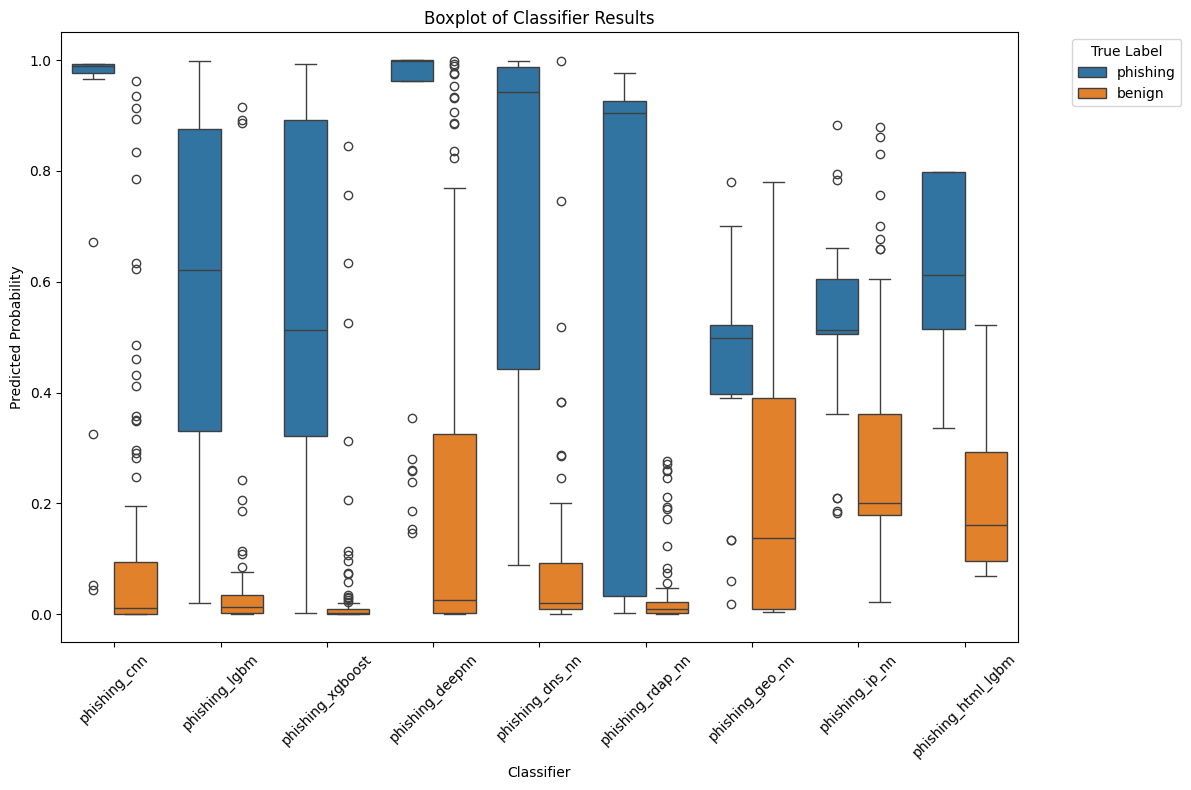

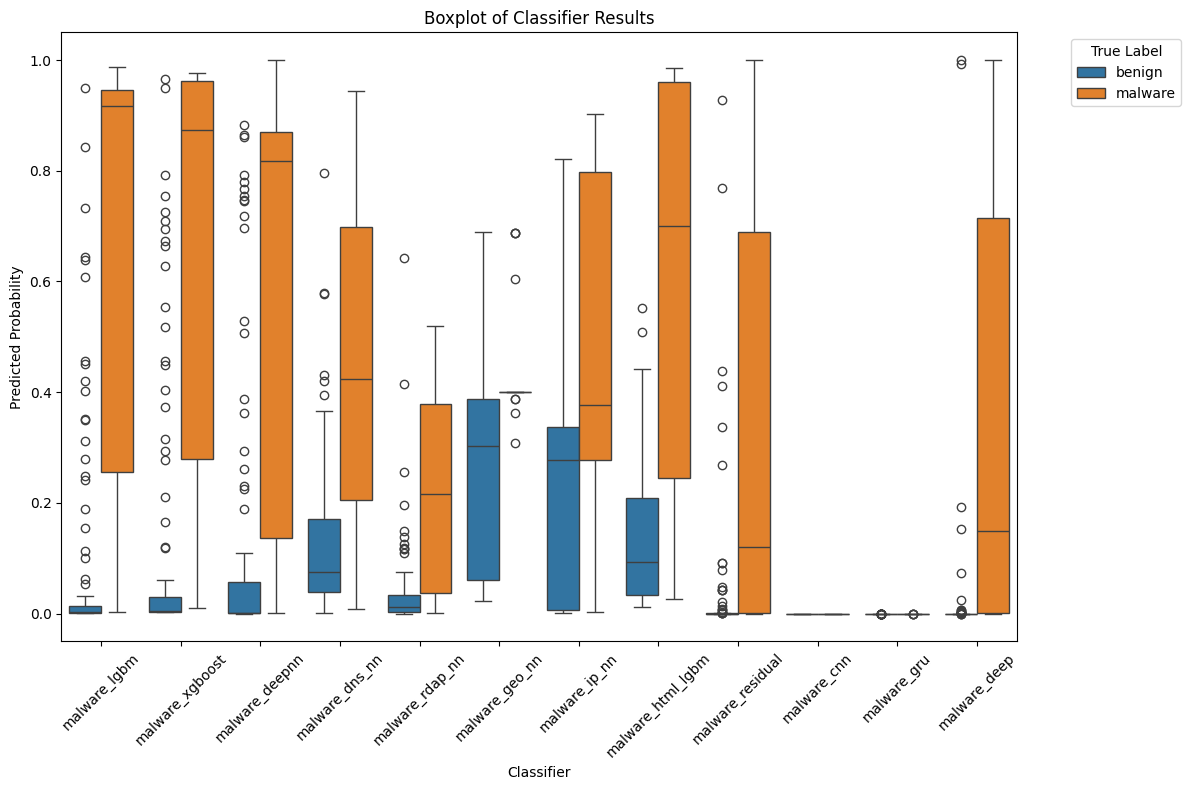

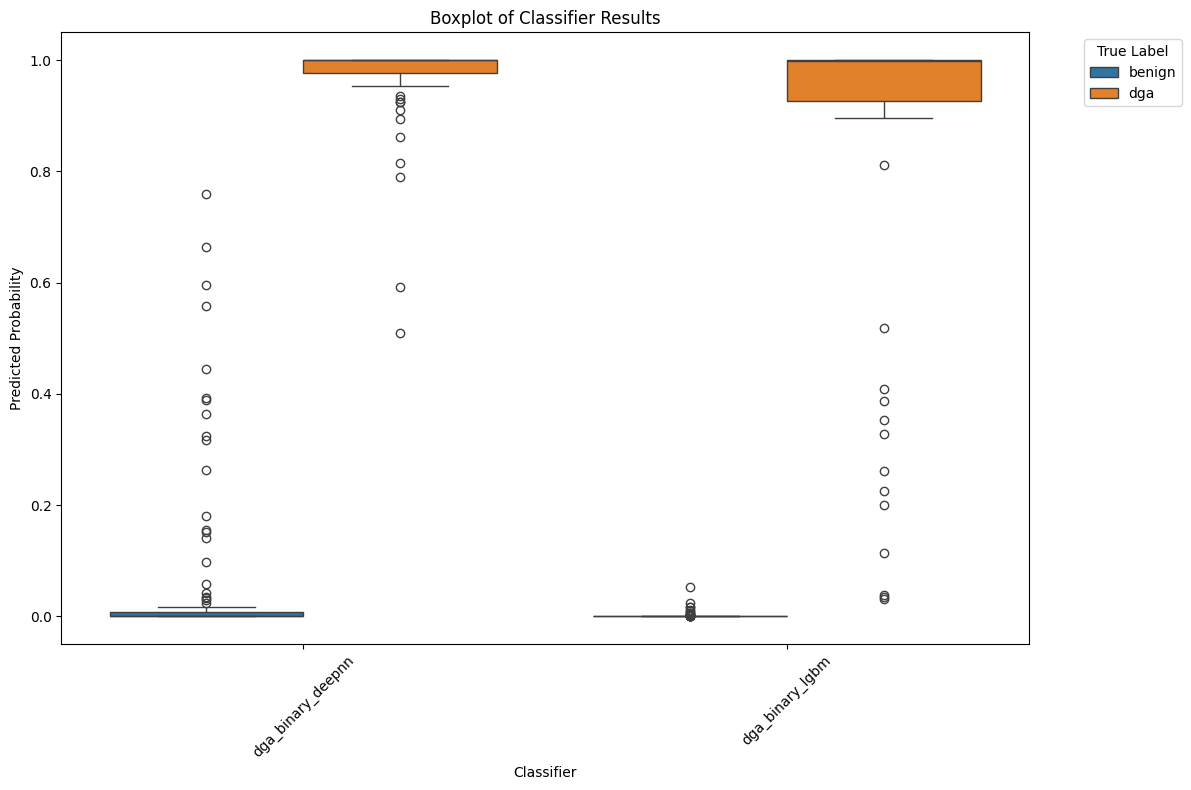

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a single boxplot for all classifiers
def create_combined_boxplot(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Prepare a long-format DataFrame for plotting
    long_df = pd.melt(filtered_df, id_vars='label', value_vars=classifier_columns, 
                      var_name='Classifier', value_name='Predicted Probability')
    
    # Remove the '_result' from classifier names
    long_df['Classifier'] = long_df['Classifier'].str.replace('_result', '')
    
    # Create a single boxplot for all classifiers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=long_df, x='Classifier', y='Predicted Probability', hue='label')
    plt.title(f'Boxplot of Classifier Results')
    plt.ylabel('Predicted Probability')
    plt.xticks(rotation=45)
    plt.legend(title='True Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Combined boxplot for phishing classifiers
create_combined_boxplot(df, 'phishing_', ['benign', 'phishing'])

# Combined boxplot for malware classifiers
create_combined_boxplot(df, 'malware_', ['benign', 'malware'])

# Combined boxplot for dga_binary classifiers
create_combined_boxplot(df, 'dga_binary_', ['benign', 'dga'])


In [9]:
## F1

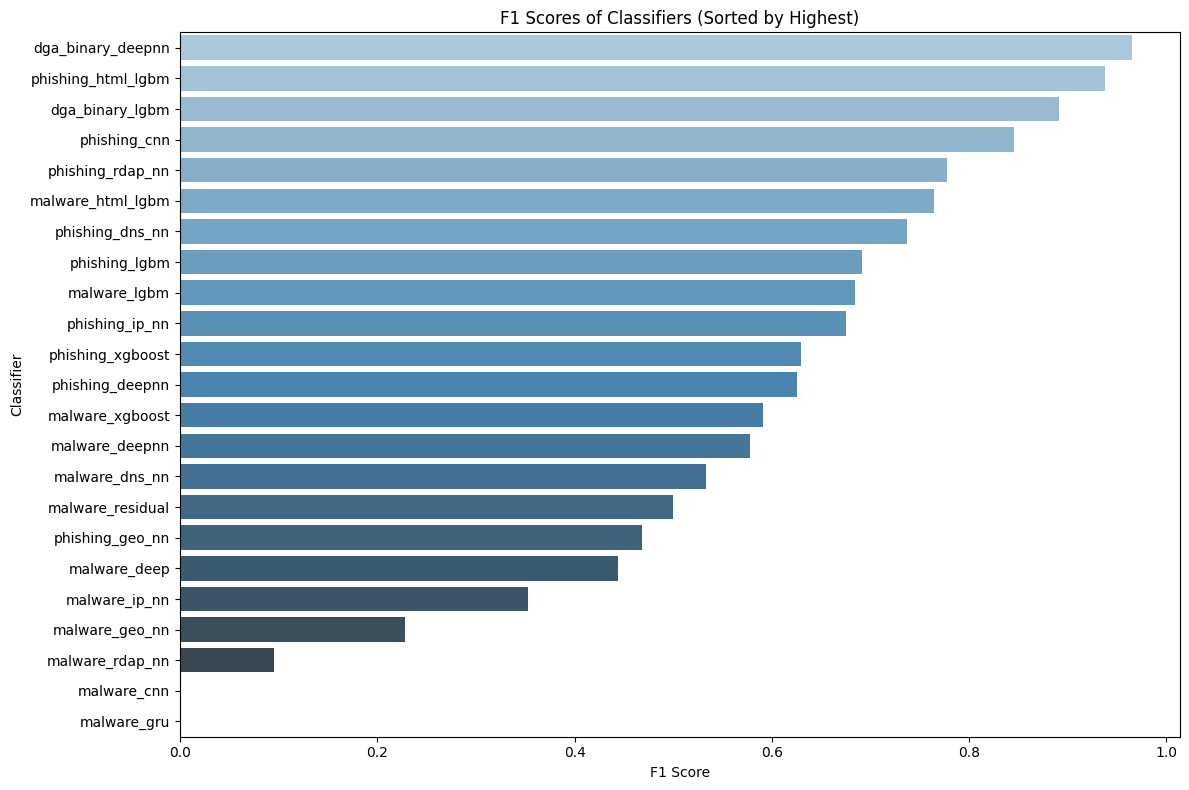

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including F1 score
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'F1 Score': f1,
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Sort the DataFrame by F1 Score in descending order
sorted_metrics_df = all_metrics_df.sort_values(by='F1 Score', ascending=False)

# Create a barplot of the F1 Scores
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='F1 Score', y='Classifier', palette='Blues_d')
plt.title('F1 Scores of Classifiers (Sorted by Highest)')
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()


## FPR

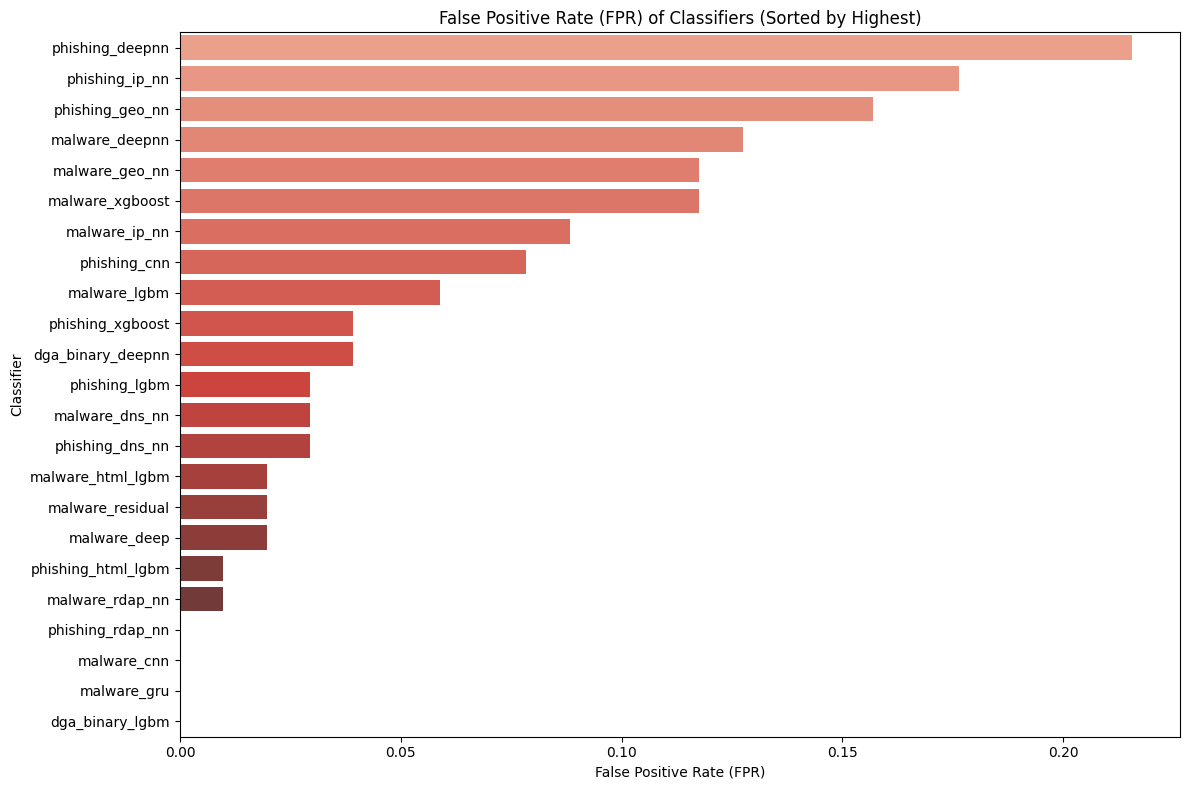

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            # Handle cases where one class is missing
            tn, fp, fn, tp = (0, 0, 0, 0)
            if len(cm) > 0:
                tn, fp = cm[0, 0], cm[0, 1]
            if len(cm) > 1:
                fn, tp = cm[1, 0], cm[1, 1]

        # Calculate metrics
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including FPR
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'FPR': false_positive_rate,
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga_binary'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Sort the DataFrame by FPR in descending order
sorted_metrics_df = all_metrics_df.sort_values(by='FPR', ascending=False)

# Create a barplot of the FPR
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='FPR', y='Classifier', palette='Reds_d')
plt.title('False Positive Rate (FPR) of Classifiers (Sorted by Highest)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()


## Best AVG metric score

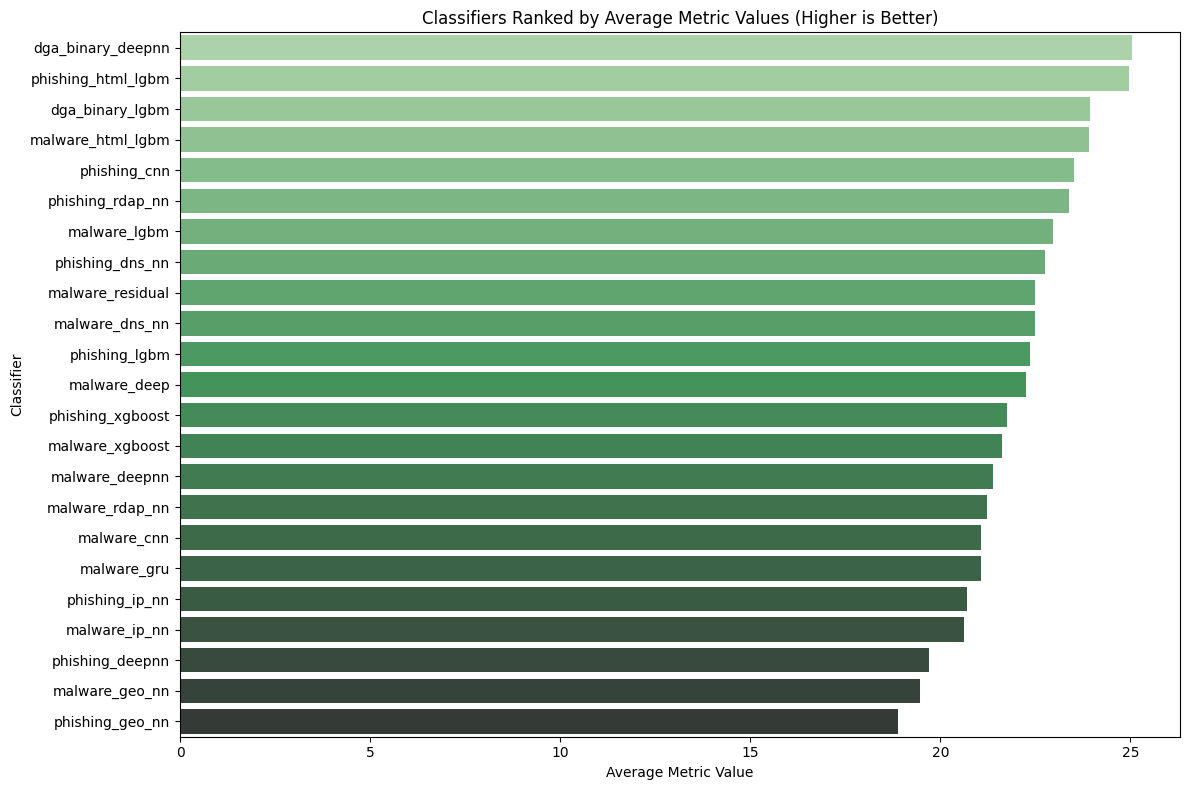

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'FPR': false_positive_rate
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Calculate the average value across all metrics for each classifier
# Note: We multiply FPR by -1 to make it "reward" lower values instead of higher ones
all_metrics_df['Avg Value'] = all_metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1) - all_metrics_df['FPR']

# Sort the DataFrame by average value
sorted_metrics_df = all_metrics_df.sort_values(by='Avg Value', ascending=False)

# Create a barplot of the average values
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='Avg Value', y='Classifier', palette='Greens_d')
plt.title('Classifiers Ranked by Average Metric Values (Higher is Better)')
plt.xlabel('Average Metric Value')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()
